In [146]:
import pandas as pd
import numpy as np
import math
import pickle
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

import random

import platform
from os import listdir
from os.path import isfile, join
from glob import glob
from pathlib import Path
import sys
import os
import copy
import traceback
import timeit



import matplotlib.pyplot as plt

import SMOTE
import CFS
import birch


from multiprocessing import Pool, cpu_count
from threading import Thread
from multiprocessing import Queue

import metrics

import sys
import traceback
import warnings

# Venn diag
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Stats

In [295]:
goals = ['recall','precision','pf','pci_20','ifa','f1']
all_results = {}
for goal in goals:
    if goal not in all_results.keys():
        all_results[goal] = {}
    results = {'GENERAL_0':[],
             'GENERAL_1':[],
             'GENERAL_2':[],
             'bellwether':[],
             'global':[],
             'self':[],
             'random':[]}
    for i in range(10):
        fold = str(i)
        data_location = 'results/median_data/level_2/fold_' + fold
        df = pd.read_csv(data_location + '/bellwether_' + goal + '.csv',index_col=0)
        TPTL_perf = pd.read_csv(data_location + '/2PTL_results.csv',index_col=0)
        for col in df.columns:
            for val in df[col]:
                if goal != 'ifa':
                    results[col].append(val)
                else:
                    results[col].append(val)
        results['TPTL'] = []
        for val in TPTL_perf[goal].values.tolist():
            if goal != 'ifa':
                results['TPTL'].append(val)
            else:
                results['TPTL'].append(val)
    all_results[goal] = results
    with open('results/median_data/level_2/Stats/' + goal + '.txt', 'w') as f:
        for key in results.keys():
            if key == 'random':
                continue
            f.write("%s \n" % key)
            for item in results[key]:
                f.write("%s " % (item))
            f.write("\n\n")

In [293]:
results = pd.DataFrame()
row_1 = ['recall', 'precision', 'pf']
for met in all_results.keys():
    for model in all_results[met].keys():
        data = all_results[met][model]
        all_data = zip(data,[met]*len(data),[model]*len(data))
        all_data_df = pd.DataFrame(all_data, columns = ['score','metric','model'])
        all_data_df.sort_values(by = 'score', inplace = True)
        results = pd.concat([results, all_data_df], axis = 0)
# results = results[results['metric'] != 'ifa']
results = results[results['metric'] != 'f1']

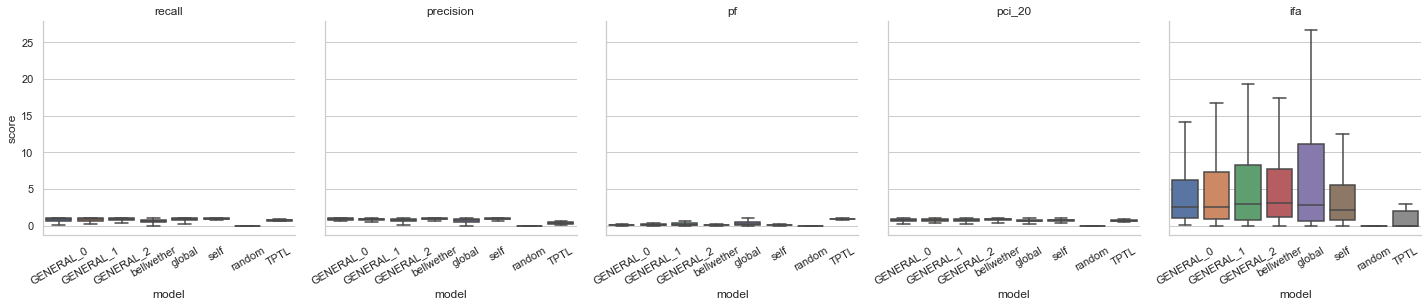

In [294]:
g = sns.catplot(x="model", y="score" ,col='metric' ,height=4,kind="box", 
                data=results, showfliers = False)
g.set_xticklabels(rotation=30)
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.savefig('results/median_data/images/pref1.pdf')